In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


# **IMPORTING LIBRARIES**

In [3]:
#importing libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **LOADING THE DATASET**

**READING THE CSV FILE**

In [4]:
#loading the dataset - using Encoding Formatter to avoid UnicodeDecodeError

df = pd.read_csv("../input/zomato-restaurants-data/zomato.csv",encoding="latin-1") 

**DISPLAYING FIRST 5 RECORDS IN THE DATASET**

In [5]:
#displaying first five records in our dataset

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **STATISTICS ON THE DATASET**

**COLUMNS IN OUR DATASET**

In [6]:
#displaying all columns in our dataset

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

> **Displaying all the columns in the dataset**

In [7]:
#number of rows and columns in our dataset

df.shape

(9551, 21)

In [8]:
#information on the columns of the dataset with its datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

> **Columns along with its datatype information can be displayed using this info() function**

In [9]:
#provides the basic statistic details of the dataset

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


> **Basic statistic details of the dataset is shown using the describe() function-ONLY NUMERICAL VARIABLES displayed**

# **EXPLORATORY DATA ANALYSIS**

# **MISSING VALUES**

**1. FINDING MISSING VALUES USING FUNCTIONS**

In [10]:
#finding missing values in our dataset

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

> **Displays all the null values in every column- 'Cuisines' column has 9 missing values hence, feature engineering has to be performed on that column**

**2. FINDING MISSING VALUES USING QUERY**

> Another easier way to display only the missing valued columns instead of all the columns unlike the previous function is the Query option

In [11]:
#finding missing values using a simple query

[features for features in df.columns if df[features].isnull().sum() >0]

['Cuisines']

**3. HEATMAP**

> One other nethod to find the missing values in our dataset is using Heatmap

<AxesSubplot:>

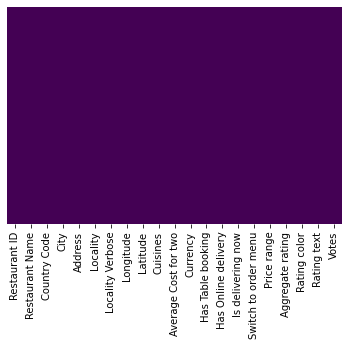

In [12]:
#finding missing values using heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

> **Missing values in our entire dataset containing about 2000 records is just 9 . Hence, it is not correctly visualized in the heatmap**

# **MERGING 2 FILES**

**READING THE EXCEL FILE**

In [13]:
# installing openpyxl to run our excel file

!pip install openpyxl 

     |████████████████████████████████| 242 kB 4.3 MB/s            


In [14]:
#loading excel file using the pd.read_excel function from PANDAS

df_country = pd.read_excel('../input/zomato-restaurants-data/Country-Code.xlsx')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


> **Our csv file has 2 columns-'Country Code' and 'Country - As you can recall, we have the 'Country Code' column in our CSV file, so let us combine this excel file and our dataset(csv file) using the pandas merge function on this column**

**MERGING BOTH FILES**

In [15]:
#merge function to merge both CSV and XSL files

final_df = pd.merge(df,df_country,on='Country Code',how='left')   #left join focusing on the left (csv dataset)

In [16]:
#displaying our final dataset

final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


> **Our final dataset has the 'Country' column added at the end of our new dataset(which is the additonal column) that has been added from excel to our dataset. Creating the final dataset**

**DISPLAYING THE DATATYPES OF FINAL DATASET**

In [17]:
#checking data types of our final dataset

final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

# **FEATURE SELECTION**

**Our final dataset has many features , let us a pick a few features & draw insights from our dataset**

**1. TOP 3 CONTRIES WITH MAXIMUM NUMBER OF ORDERS**

In [18]:
#displaying the total number of records based on country

final_df.Country.value_counts()  

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

> **INFERENCE --> From this we can summarize that the maximum number of transactions happen in India**

**PIE CHART VISUALIZATION**

([<matplotlib.patches.Wedge at 0x7f5f9afa6b90>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

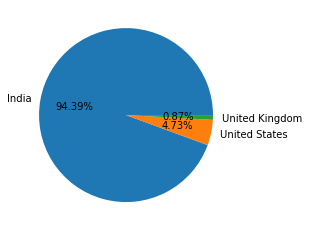

In [19]:
#pie chart to display the top 3 countries with maximum orders


country_names = final_df.Country.value_counts().index                 #getting the country names
country_val = final_df.Country.value_counts().values                  # number of records of each country

plt.pie(country_val[:3],labels=country_names[:3], autopct='%1.2f%%')  #autopct used for getting percentage values 

> **INFERENCE --> The top 3 countries with maximum number of orders are India (with maximum), USA and then UK.**

**2. COUNTRY WITH MOST RATINGS**

In [20]:
#displaying the ratings related columns in a dataframe format

final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


> **INFERENCE ->**
> * Rating color is WHITE when it is NOT RATED
> * Rating color is RED when it is POOR
> * Rating color is ORANGE when it is AVERAGE
> * Rating color is YELLOW when it is GOOD
> * Rating color is GREEN when it is VERY GOOD
> * Rating color is DARK GREEN when it is EXCELLENT


In [21]:
#renaming the 0  column to rating count for readability (storing it as a dataset)

ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


> **INFERENCE--> Around 2k ppl have given zero ratings. 
ratings (4.5-4.9)=excellent. 
4.0 to 4.4=v.good. 
3.5 to 3.9=good. 
2.5 to 3.4 = average & so on**

In [22]:
#displaying first five records in the ratings dataset

ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


**BAR CHART VISUALIZATION**

Text(0.5, 1.0, 'User Ratings')

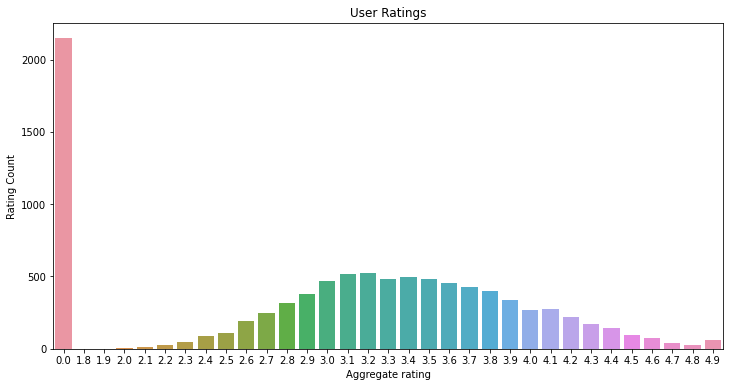

In [23]:
#bar plot visualization

plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)
plt.title('User Ratings')

> **Displaying the user rating count in a bar plot. But this would be better if the ratings are displayed in the same color as that of the rating color. Let us replot with each rating's own color**

Text(0.5, 1.0, 'User Ratings')

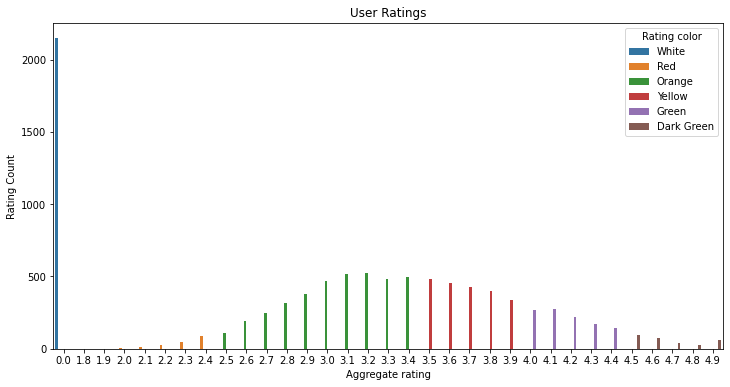

In [24]:
#observing the same  bar plot in the rating colors


plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',hue = 'Rating color',data=ratings)
plt.title('User Ratings')

> **Colors are right but have been mapped wrong. Hence have to map them to the right ratings**

Text(0.5, 1.0, 'User Ratings')

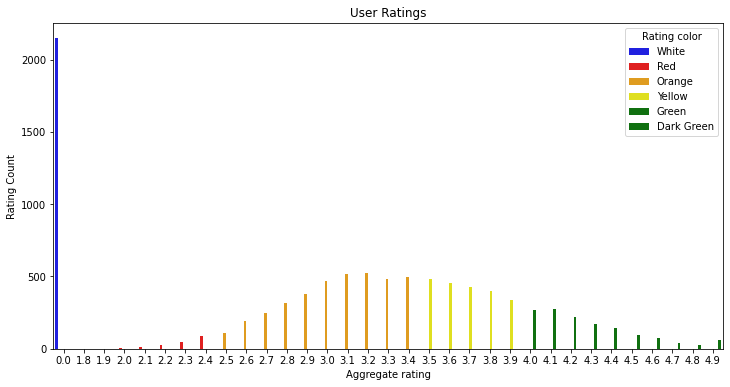

In [25]:
#observing the same bar plot in the rating colors


plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',hue = 'Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])
plt.title('User Ratings')

> **Perfect color mapping is done**




> **INFERENCE- Count of the not rated ones are the highest(white-BLUE for visibility)**

> * Ratings between 4.5 to 4.9 is Excellent (Dark Green) 
> * Ratings between 4.0 to 4.4 is Very Good (Green)
> * Ratings between 3.5 to 3.9 is Good (Yellow)
> * Ratings between 2.5 to 3.4 is Average (Orange)
> * Ratings between 1.8 to 2.4 is Poor (Red)

**3. COUNT THE RATINGS**

**COUNT PLOT VISUALIZATION**

<AxesSubplot:xlabel='Rating color', ylabel='count'>

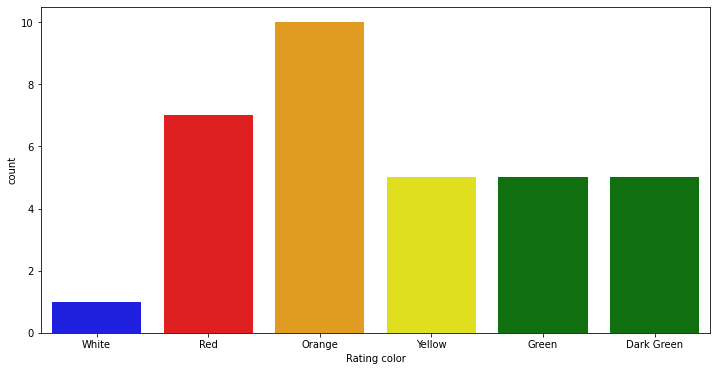

In [26]:
#countplot to count the total rating based on color

sns.countplot(x='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

**4. COUNTRIES WITH ZERO RATINGS**

In [27]:
#finding the names of the countries that has given zero rating

final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index()
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


> **INFERENCE--> Out of 2148 records , there are 2139 zero ratings which is from India(being the maximum)**

**5. CURRENCY USED IN EACH COUNTRY**

In [28]:
#finding which currency is used in which country

final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


**6. COUNTRIES THAT DO NOT HAVE ONLINE DELIVERY OPTION**

In [29]:
#finding the countries that have online delivery

final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

> **INFERENCE --> Online deliveries are available in both India and UAE**

**7. CITY DISTRIBUTION OF TOP 5 CITIES**

**PIE CHART VISUALIZATION**

([<matplotlib.patches.Wedge at 0x7f5f7f421210>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

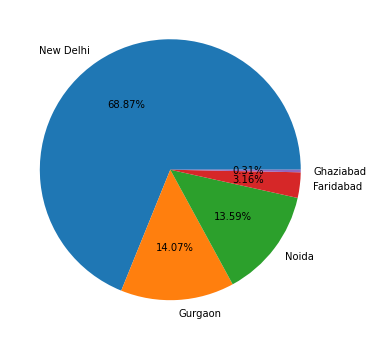

In [30]:
#pie chart for cities distribution - displaying the top 5 cities

city_val = final_df.City.value_counts()
city_label = final_df.City.value_counts().index

plt.pie(x = city_val[:5],labels = city_label[:5],autopct='%1.2f%%')

> **INFERENCE - Maximum transactions happen in New Delhi of India**

**8. TOP 10 CUISINES**

**PIE CHART VISUALIZATION**

([<matplotlib.patches.Wedge at 0x7f5f7f40f350>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664212, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.50514632158

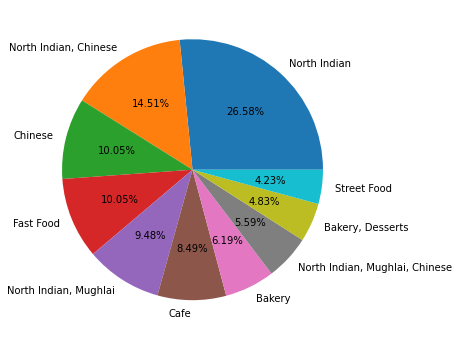

In [31]:
#pie chart to display the top 10 cuisines

cuisine_val = final_df.Cuisines.value_counts()              #values
cuisine_label = final_df.Cuisines.value_counts().index      #labels

plt.pie(x = cuisine_val[:10],labels = cuisine_label[:10],autopct='%1.2f%%')

> **Most ordered cuisine is North Indian**

**PLEASE UPVOTE IF YOU FOUND THE CONTENT USEFUL :)**